In [1]:
import matplotlib.pyplot as plt

### Exp 1

In [5]:
raw_result = '''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.56s   392.67ms   2.00s    81.79%
    Req/Sec    28.44     24.09   111.00     67.78%
  3018 requests in 30.03s, 0.88MB read
  Socket errors: connect 0, read 0, write 0, timeout 2716
Requests/sec:    100.51
Transfer/sec:     29.88KB'''

In [135]:
def process_wrk_result(raw):
  lines = list(map(lambda r: list(filter(None, r.split(" "))), raw.split("\n")))
  ret = []
  ret += lines[3][1:3]
  ret += lines[4][1:3]
  ret.append(lines[5][0])
  ret.append(lines[6][-1])
  ret.append(lines[7][1])
  return ret
  
process_wrk_result(raw_result)

['1.56s', '392.67ms', '28.44', '24.09', '3018', '2716', '100.51']

In [136]:
r = ['''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.74s   253.00ms   2.00s    79.79%
    Req/Sec    41.17     42.45   202.00     83.92%
  4641 requests in 30.03s, 1.34MB read
  Socket errors: connect 0, read 0, write 0, timeout 2795
Requests/sec:    154.52
Transfer/sec:     45.85KB''',
     '''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.53s   357.63ms   2.00s    81.17%
    Req/Sec    33.69     29.81   171.00     72.15%
  3777 requests in 30.10s, 1.09MB read
  Socket errors: connect 0, read 0, write 0, timeout 3331
Requests/sec:    125.49
Transfer/sec:     37.25KB''',
  '''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.56s   392.67ms   2.00s    81.79%
    Req/Sec    28.44     24.09   111.00     67.78%
  3018 requests in 30.03s, 0.88MB read
  Socket errors: connect 0, read 0, write 0, timeout 2716
Requests/sec:    100.51
Transfer/sec:     29.88KB
''','''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.59s   427.28ms   2.00s    84.55%
    Req/Sec    27.63     25.72   121.00     74.13%
  2486 requests in 30.07s, 738.56KB read
  Socket errors: connect 0, read 0, write 0, timeout 2240
Requests/sec:     82.69
Transfer/sec:     24.57KB
''','''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.54s   463.55ms   2.00s    85.37%
    Req/Sec    24.78     22.22   111.00     68.37%
  2138 requests in 30.10s, 637.00KB read
  Socket errors: connect 0, read 0, write 0, timeout 1974
Requests/sec:     71.04
Transfer/sec:     21.16KB
''','''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.25s   586.61ms   2.00s    54.22%
    Req/Sec    21.25     16.73    80.00     64.59%
  1743 requests in 30.10s, 517.12KB read
  Socket errors: connect 0, read 0, write 0, timeout 1660
Requests/sec:     57.91
Transfer/sec:     17.18KB
''','''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.32s   475.54ms   1.99s    65.75%
    Req/Sec    18.64     14.69    80.00     69.63%
  1563 requests in 30.09s, 466.78KB read
  Socket errors: connect 0, read 0, write 0, timeout 1490
Requests/sec:     51.94
Transfer/sec:     15.51KB
''','''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.30s   495.15ms   2.00s    63.24%
    Req/Sec    13.12     10.79    70.00     76.25%
  1472 requests in 30.10s, 439.84KB read
  Socket errors: connect 0, read 0, write 0, timeout 1404
Requests/sec:     48.91
Transfer/sec:     14.62KB
''','''Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.02s   575.75ms   2.00s    61.36%
    Req/Sec    16.70     12.82    60.00     62.52%
  1328 requests in 30.10s, 399.89KB read
  Socket errors: connect 0, read 0, write 0, timeout 1284
Requests/sec:     44.12
Transfer/sec:     13.29KB''']

In [137]:
load = [200*i for i in range(1, 10)]
res = [0.05 for i in range(1, 10)]
rtt = [80 for i in range(1, 10)]

In [138]:
resultsnew = list(map(process_wrk_result, r))

In [139]:
len(resultsnew)

9

In [143]:
r = []
for row in resultsnew:
  r.append(np.array(list(map(lambda a: float(a[:-2]) if 'ms' in a else float(a[:-1])*1000 if 's' in a else float(a), row))))

r_a = np.array(r)

In [149]:
r_n = (r_a-np.mean(r_a, axis=0))/np.std(r_a, axis=0)

In [162]:
labels = ["Latency: Avg", "Latency: Stdev", "R/s: Avg", "R/s: Stdev", "Total Req", "timeout Req", "R/s"]
y_labels = ["ms", "latency, std", "requests/s", "requests/s, std", "total requests", "timeout requests", "Total Requests Served"]
x_label = "load (nth prime number)"

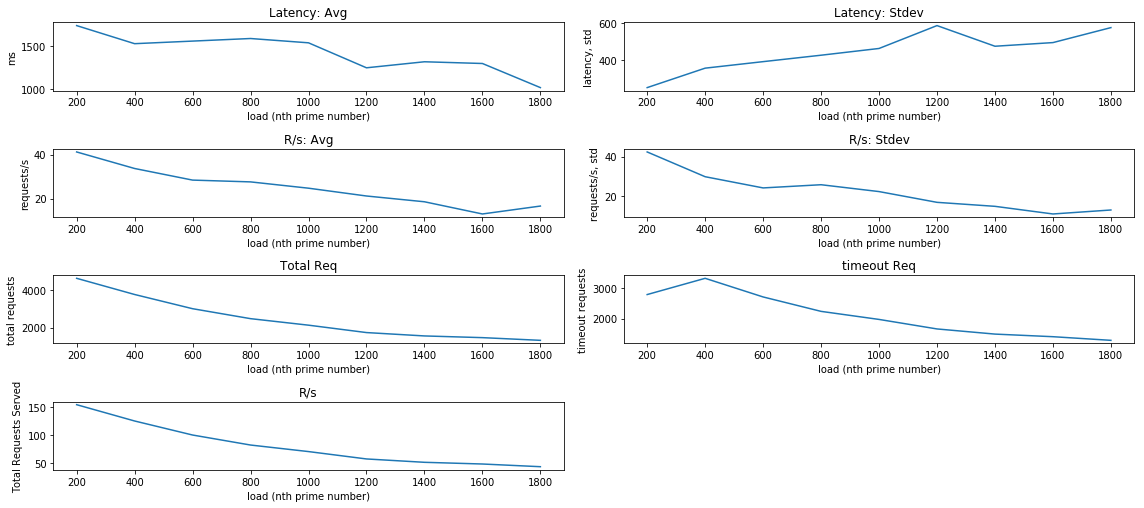

In [166]:
plt.figure(figsize=(16, 12))
nplots = len(labels)
for col in range(nplots):
  plt.subplot(nplots, 2, col+1)
  plt.plot(load, r_a[:,col])
  plt.xlabel(x_label)
  plt.ylabel(y_labels[col])
  plt.title(labels[col])
plt.tight_layout()
plt.show()
  
  


In [167]:
primes = [200*i for i in range(1, 10)]
res = [0.05 for i in range(1, 10)]
rtt = [80 for i in range(1, 10)]

In [341]:
r2 = '''Running 30s test @ http://localhost:5000/pick                                                                                                                                                       
  10 threads and 400 connections                                                                                                                                                                    
  Thread Stats   Avg      Stdev     Max   +/- Stdev                                                                                                                                                 
    Latency     1.73s   237.29ms   2.00s    84.13%                                                                                                                                                  
    Req/Sec    32.69     34.63   250.00     87.23%                                                                                                                                                  
  Latency Distribution                                                                                                                                                                              
     50%    1.80s                                                                                                                                                                                   
     75%    1.90s                                                                                                                                                                                   
     90%    1.90s                                                                                                                                                                                   
     99%    2.00s                                                                                                                                                                                   
  4682 requests in 30.05s, 1.36MB read                                                                                                                                                              
  Socket errors: connect 0, read 0, write 0, timeout 2804                                                                                                                                           
Requests/sec:    155.81                                                                                                                                                                             
Transfer/sec:     46.34KB                                                                                                                                                                           
''',''' Running 30s test @ http://localhost:5000/pick                                                                                                                                                       
  10 threads and 400 connections                                                                                                                                                                    
  Thread Stats   Avg      Stdev     Max   +/- Stdev                                                                                                                                                 
    Latency     1.73s   239.41ms   2.00s    81.57%                                                                                                                                                  
    Req/Sec    40.93     43.08   252.00     86.09%                                                                                                                                                  
  Latency Distribution                                                                                                                                                                              
     50%    1.80s                                                                                                                                                                                   
     75%    1.89s                                                                                                                                                                                   
     90%    1.90s                                                                                                                                                                                   
     99%    2.00s                                                                                                                                                                                   
  4614 requests in 30.10s, 1.34MB read                                                                                                                                                              
  Socket errors: connect 0, read 0, write 0, timeout 2856                                                                                                                                           
Requests/sec:    153.29                                                                                                                                                                             
Transfer/sec:     45.44KB                                                                                                                                                                           
''',''' Running 30s test @ http://localhost:5000/pick                                                                                                                                                       
  10 threads and 400 connections                                                                                                                                                                    
  Thread Stats   Avg      Stdev     Max   +/- Stdev                                                                                                                                                 
    Latency     1.73s   270.26ms   2.00s    78.04%                                                                                                                                                  
    Req/Sec    40.65     39.90   252.00     82.63%                                                                                                                                                  
  Latency Distribution                                                                                                                                                                              
     50%    1.80s                                                                                                                                                                                   
     75%    1.90s                                                                                                                                                                                   
     90%    2.00s                                                                                                                                                                                   
     99%    2.00s                                                                                                                                                                                   
  4670 requests in 30.04s, 1.36MB read                                                                                                                                                              
  Socket errors: connect 0, read 0, write 0, timeout 2821                                                                                                                                           
Requests/sec:    155.48
Transfer/sec:     46.25KB
''',''' Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.59s   407.40ms   2.00s    78.93%
    Req/Sec    28.41     23.84   101.00     65.03%
  Latency Distribution
     50%    1.70s
     75%    1.90s
     90%    1.90s
     99%    2.00s
  2480 requests in 30.03s, 737.54KB read
  Socket errors: connect 0, read 0, write 0, timeout 2219
Requests/sec:     82.58
Transfer/sec:     24.56KB
''',''' Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.62s   382.89ms   2.00s    86.10%
    Req/Sec    28.17     23.89   101.00     66.93%
  Latency Distribution
     50%    1.70s
     75%    1.90s
     90%    1.99s
     99%    2.00s
  2487 requests in 30.03s, 739.21KB read
  Socket errors: connect 0, read 0, write 0, timeout 2264
Requests/sec:     82.82
Transfer/sec:     24.62KB
''',''' Running 30s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.62s   405.43ms   2.00s    84.91%
    Req/Sec    28.31     25.69   121.00     73.88%
  Latency Distribution
     50%    1.70s
     75%    1.90s
     90%    2.00s
     99%    2.00s
  2487 requests in 30.10s, 739.48KB read
  Socket errors: connect 0, read 0, write 0, timeout 2255
Requests/sec:     82.63
Transfer/sec:     24.57KB'''

In [342]:
def process_wrk_result(raw):
  lines = list(map(lambda r: list(filter(None, r.split(" "))), raw.split("\n")))
  ret = []
  ret += lines[3][1:3]
  ret += lines[4][1:3]
  ret.append(lines[10][0])
  ret.append(lines[11][-1])
  ret.append(lines[12][1])
  return ret
  
# process_wrk_result(raw_result)

In [343]:
load = [200, 200, 200, 800, 800, 800]
res = [0.05 for i in range(len(load))]
rtt = [80 for i in range(len(load))]

In [344]:
resultsnew = list(map(process_wrk_result, r2))

In [345]:
r = []
for row in resultsnew:
  r.append(np.array(list(map(lambda a: float(a[:-2]) if 'ms' in a else float(a[:-1])*1000 if 's' in a else float(a), row))))

r_a = np.array(r)

In [346]:
labels = ["Latency", "Requests/s", "Total Requests", "Requests timed out", "Requests/s"]
y_labels = ["ms", "requests/s", "total requests", "requests timed out", "Total Requests Served"]
x_label = "load (nth prime number)"

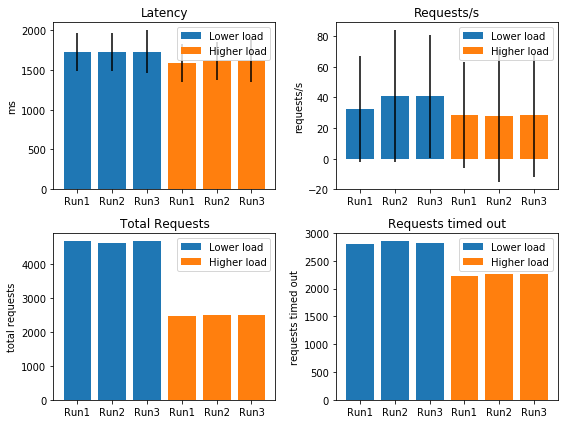

In [348]:
plt.figure(figsize=(8, 6))
nplots = len(labels)
cmap = plt.get_cmap("tab10")
for col in range(2):
  plt.subplot(2, 2, col+1)
  plt.bar(range(0, 3), r_a[:,col*2][:3], color=cmap(0), label="Lower load", yerr=r_a[:,col*2+1][:3])
  plt.bar(range(3, 6), r_a[:,col*2][3:], color=cmap(1), label="Higher load", yerr=r_a[:,col*2+1][:3])
  plt.ylabel(y_labels[col])
  plt.xticks(range(6), ["Run1", "Run2", "Run3"]*2)
  plt.title(labels[col])
  plt.legend()
for col in range(4,6):
  plt.subplot(2, 2, col-1)
  plt.bar(range(0, 3), r_a[:,col][:3], color=cmap(0), label="Lower load")
  plt.bar(range(3, 6), r_a[:,col][3:], color=cmap(1), label="Higher load")
  plt.ylabel(y_labels[col-2])
  plt.xticks(range(6), ["Run1", "Run2", "Run3"]*2)
  plt.title(labels[col-2])
  plt.legend()
plt.tight_layout()
plt.show()

In [215]:
raw_r = ["""PARAMS:, 200 80 0.05
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.41s   374.30ms   2.00s    69.29%
    Req/Sec    45.26     41.09   202.00     63.84%
  Latency Distribution
     50%    1.50s
     75%    1.59s
     90%    1.90s
     99%    2.00s
  2607 requests in 20.10s, 771.54KB read
  Socket errors: connect 0, read 0, write 0, timeout 2125
Requests/sec:    129.73
Transfer/sec:     38.39KB
""",""" PARAMS:, 200 80 0.1
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency   973.72ms  241.79ms   1.98s    83.07%
    Req/Sec    69.94     69.56   333.00     82.81%
  Latency Distribution
     50%  900.83ms
     75%    1.10s
     90%    1.20s
     99%    1.80s
  7438 requests in 20.10s, 2.16MB read
  Socket errors: connect 0, read 0, write 0, timeout 115
Requests/sec:    370.08
Transfer/sec:    109.94KB
""",""" PARAMS:, 200 80 0.2
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency   389.79ms   80.12ms   1.34s    82.42%
    Req/Sec   113.99     85.26   380.00     63.57%
  Latency Distribution
     50%  385.03ms 
     75%  402.44ms
     90%  496.36ms
     99%  601.79ms
  19014 requests in 20.10s, 5.51MB read
  Socket errors: connect 0, read 0, write 0, timeout 123
Requests/sec:    946.14
Transfer/sec:    280.96KB
""","""PARAMS:, 800 80 0.05
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.59s   409.93ms   2.00s    86.21%
    Req/Sec    32.10     27.47   130.00     63.81%
  Latency Distribution
     50%    1.70s
     75%    1.89s
     90%    1.99s
     99%    2.00s
  1590 requests in 20.10s, 470.85KB read
  Socket errors: connect 0, read 0, write 0, timeout 1358
Requests/sec:     79.10
Transfer/sec:     23.43KB
""",""" PARAMS:, 800 80 0.1
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.60s   403.06ms   2.00s    84.11%
    Req/Sec    45.35     39.75   230.00     72.56%
  Latency Distribution
     50%    1.79s
     75%    1.89s
     90%    1.91s
     99%    2.00s
  3639 requests in 20.10s, 1.06MB read
  Socket errors: connect 0, read 0, write 0, timeout 1569
Requests/sec:    181.04
Transfer/sec:     53.80KB
""",""" PARAMS:, 800 80 0.2
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency   836.15ms  136.03ms   1.87s    78.04%
    Req/Sec    82.21     80.49   370.00     81.28%
  Latency Distribution
     50%  807.67ms
     75%  896.92ms
     90%    1.00s
     99%    1.18s
  8903 requests in 20.09s, 2.58MB read
  Socket errors: connect 0, read 0, write 0, timeout 89
Requests/sec:    443.14
Transfer/sec:    131.67KB
""","""PARAMS:, 1400 80 0.05
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.36s   472.97ms   2.00s    59.09%
    Req/Sec    22.90     17.78    80.00     69.54%
  Latency Distribution
     50%    1.49s
     75%    1.79s
     90%    1.90s
     99%    2.00s
  983 requests in 20.09s, 293.86KB read
  Socket errors: connect 0, read 0, write 0, timeout 917
Requests/sec:     48.94
Transfer/sec:     14.63KB
""",""" PARAMS:, 1400 80 0.1
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.55s   428.44ms   2.00s    75.90%
    Req/Sec    36.86     25.66   121.00     60.15%
  Latency Distribution
     50%    1.70s
     75%    1.81s
     90%    1.90s
     99%    2.00s
  2160 requests in 20.10s, 646.57KB read
  Socket errors: connect 0, read 0, write 0, timeout 1662
Requests/sec:    107.47
Transfer/sec:     32.17KB
""",""" PARAMS:, 1400 80 0.2
Running 20s test @ http://localhost:5000/pick
  10 threads and 400 connections
  Thread Stats   Avg      Stdev     Max   +/- Stdev
    Latency     1.39s   300.63ms   1.79s    79.75%
    Req/Sec    45.51     39.41   230.00     70.03%
  Latency Distribution
     50%    1.48s
     75%    1.58s
     90%    1.68s
     99%    1.71s
  5057 requests in 20.05s, 1.48MB read
  Socket errors: connect 0, read 0, write 0, timeout 212
Requests/sec:    252.26
Transfer/sec:     75.38KB"""]

In [216]:
def process_wrk_result(raw):
  lines = list(map(lambda r: list(filter(None, r.split(" "))), raw.split("\n")))
  ret = []
  load, rtt, res = lines[0][1], lines[0][2], lines[0][3]
  ret += lines[4][1:3]
  ret += lines[5][1:3]
  ret.append(lines[11][0])
  ret.append(lines[12][-1])
  ret.append(lines[13][1])
  return load, rtt, res, ret

In [219]:
loads = []
rtts = []
ress = []
results = []
for raw in raw_r:
  load, rtt, res, ret = process_wrk_result(raw)
  loads.append(load)
  rtts.append(rtt)
  ress.append(res)
  results.append(ret)

In [220]:
labels = "loads", "rtts", "ress"

plt.figure(figsize=(16, 12))
nplots = len(labels)
for col in range(nplots):
  plt.subplot(nplots, 1, col+1)
  plt.plot(range(len(eval(labels[col]))), eval(labels[col]))
  plt.title(labels[col])
plt.tight_layout()
plt.show()

In [222]:
exec(open("/mnt/c/Users/sddhr/results01", "r").read())

In [223]:
loads_1 = []
rtts_1 = []
ress_1 = []
results_1 = []
for raw in raw_r:
  load, rtt, res, ret = process_wrk_result(raw)
  loads_1.append(load)
  rtts_1.append(rtt)
  ress_1.append(res)
  results_1.append(ret)

In [224]:
import numpy as np
import scipy as sp

In [225]:
loads_1 = np.array(list(map(int, loads_1)))
rtts_1 = np.array(list(map(int, rtts_1)))
ress_1 = np.array(list(map(float, ress_1)))
r = []
for row in results_1:
  r.append(np.array(list(map(lambda a: float(a[:-2]) if 'ms' in a else float(a[:-1])*1000 if 's' in a else float(a), row))))
r_1 = np.array(r)

In [238]:
def filter_by_(filter_array_i, value, dep_arrays):
  assert(len(np.unique(list(map(len, dep_arrays)))) == 1)
  filtr = dep_arrays[filter_array_i] == value
  return list(map(lambda e: e[filtr], dep_arrays))

In [227]:
loads_1

array([ 200,  200,  200,  200,  200,  200,  200,  200,  200,  800,  800,
        800,  800,  800,  800,  800,  800,  800, 1400, 1400, 1400, 1400,
       1400, 1400, 1400, 1400, 1400])

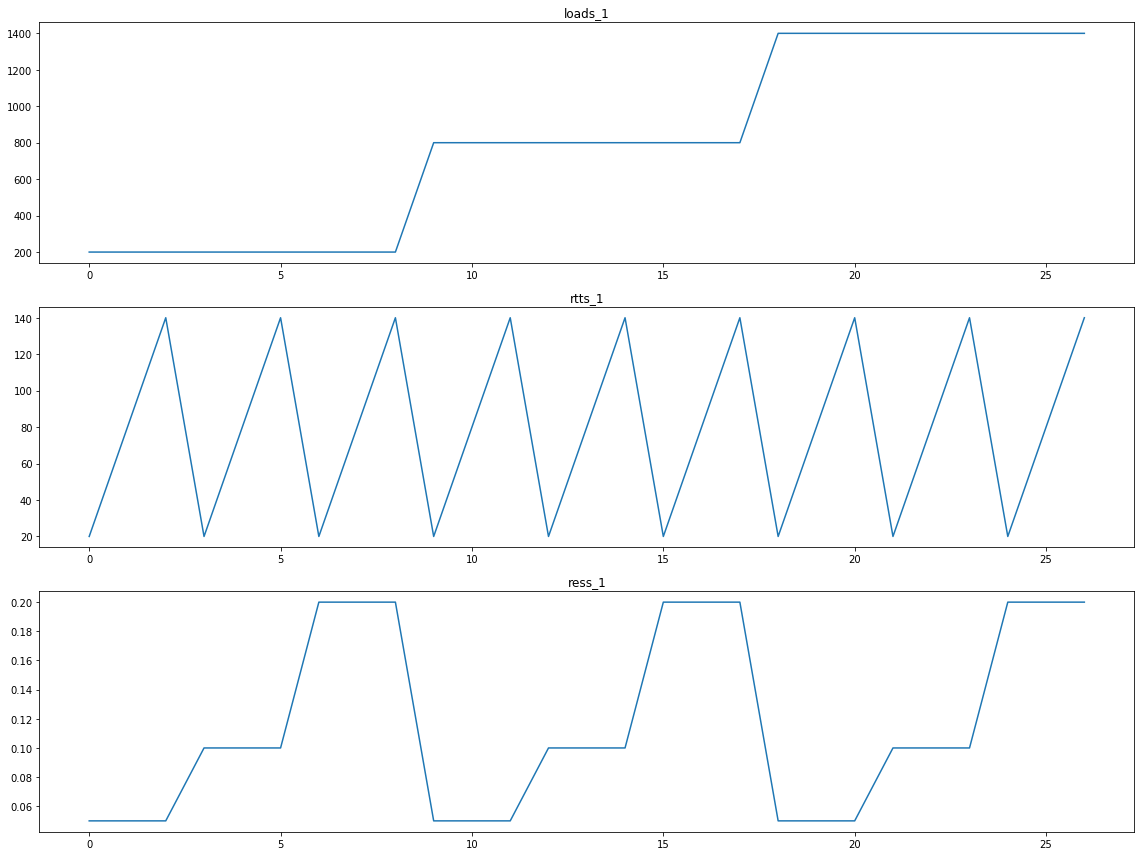

In [228]:
labels = "loads_1", "rtts_1", "ress_1"

plt.figure(figsize=(16, 12))
nplots = len(labels)
for col in range(nplots):
  plt.subplot(nplots, 1, col+1)
  plt.plot(range(len(eval(labels[col]))), eval(labels[col]))
  plt.title(labels[col])
plt.tight_layout()
plt.show()

In [239]:
_f = filter_by_

In [ ]:
nrows = len(np.unique(loads_1))
ncols = len(np.unique(rtts_1))
datas = [rtts_1, ress_1, r_1]
for l in np.unique(loads_1):
  idatas = _f(loads_1, l, datas)
  for i in range(length(np.unique(rtts_1))):
    iidatas = _f(idatas[0], np.unique(rtts_1)[i], idatas)
    x = range(len(np.unique(ress_1)))
    plt.bar(x, iidatas[])

In [269]:
data = _f(1, 20, _f(0, 800, [loads_1, rtts_1, r_1]))[2]
data2 = _f(1, 80, _f(0, 800, [loads_1, rtts_1, r_1]))[2]
data3 = _f(1, 140, _f(0, 800, [loads_1, rtts_1, r_1]))[2]
data4= _f(1, 20, _f(0, 200, [loads_1, rtts_1, r_1]))[2]
data5 = _f(1, 80, _f(0, 200, [loads_1, rtts_1, r_1]))[2]
data6 = _f(1, 140, _f(0, 200, [loads_1, rtts_1, r_1]))[2]
data7= _f(1, 20, _f(0, 1400, [loads_1, rtts_1, r_1]))[2]
data8 = _f(1, 80, _f(0, 1400, [loads_1, rtts_1, r_1]))[2]
data9 = _f(1, 140, _f(0, 1400, [loads_1, rtts_1, r_1]))[2]

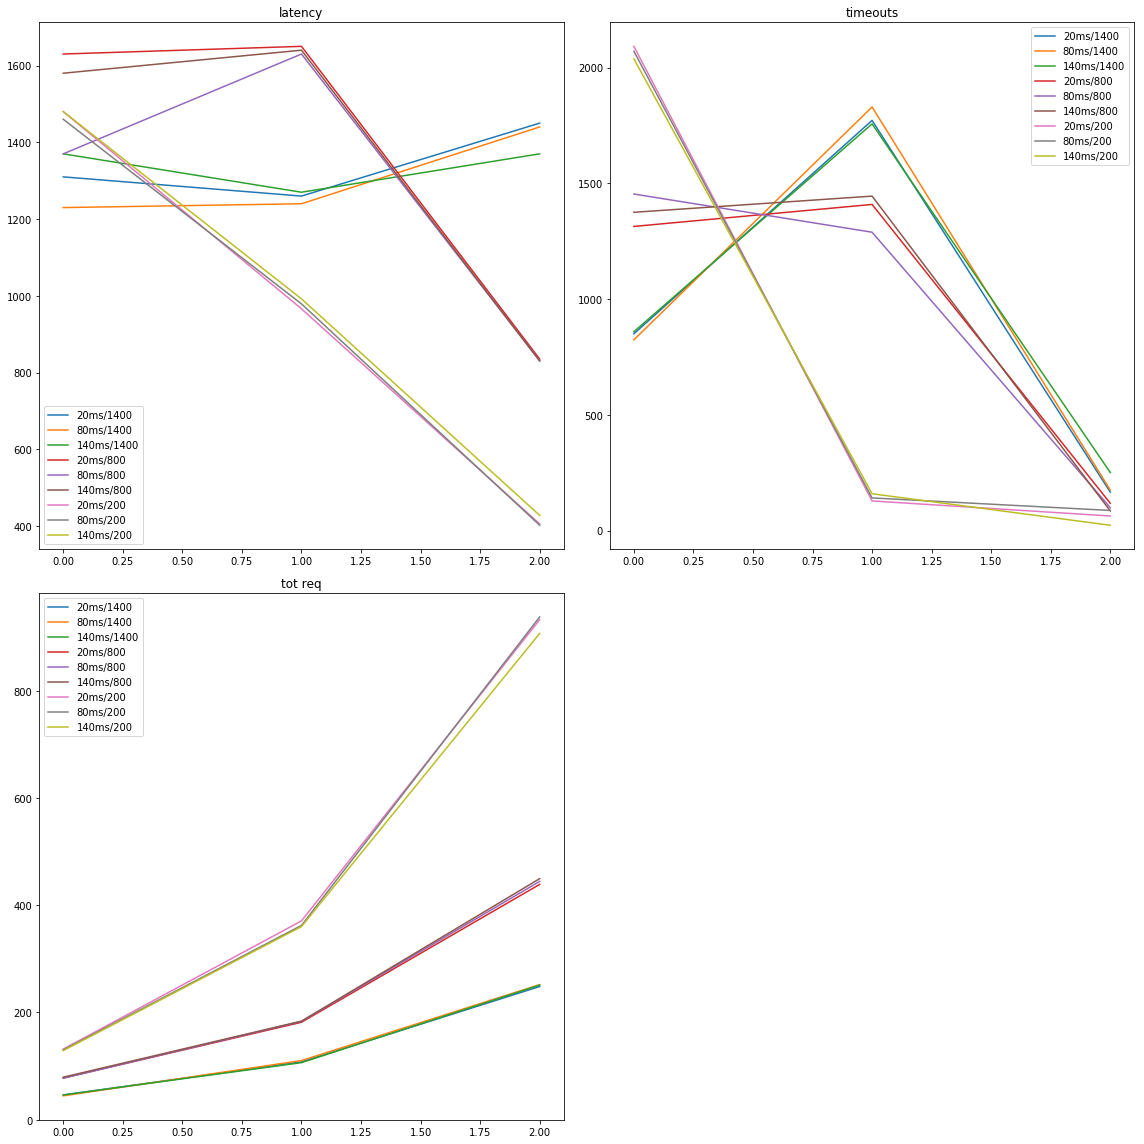

In [273]:
plt.figure(figsize=(16, 16))
col_i = [0, 5, 6]
labels = ["latency",  "timeouts", "tot req"]
for i in range(len(col_i)):
  plt.subplot(int(len(col_i)/2)+1, 2, i+1)
  plt.plot(data7[:,col_i[i]], label="20ms/1400")
  plt.plot(data8[:,col_i[i]], label="80ms/1400")
  plt.plot(data9[:,col_i[i]], label="140ms/1400")
  plt.plot(data[:,col_i[i]], label="20ms/800")
  plt.plot(data2[:,col_i[i]], label="80ms/800")
  plt.plot(data3[:,col_i[i]], label="140ms/800")
  plt.plot(data4[:,col_i[i]], label="20ms/200")
  plt.plot(data5[:,col_i[i]], label="80ms/200")
  plt.plot(data6[:,col_i[i]], label="140ms/200")
  plt.title(labels[i])
  plt.legend()
plt.tight_layout()
plt.show()

In [253]:
data

array([[ 1630.  ,   390.57,    28.88,    24.37,  1562.  ,  1314.  ,
           77.73],
       [ 1650.  ,   401.13,    41.55,    41.56,  3653.  ,  1409.  ,
          181.75],
       [  835.44,   163.76,    78.43,    78.49,  8814.  ,   118.  ,
          438.87]])

In [274]:
exec(open('/mnt/c/Users/sddhr/src/cloud/TierProvision/results/results03', 'r').read())

In [277]:
len(raw_r)

36

In [281]:
db_lines = db_raw_r.split('\n')[:-1]
for i in range(len(raw_r)):
  raw_r[i] = raw_r[i]+db_lines[i]

In [288]:
def process_wrk_result(raw):
  lines = list(map(lambda r: list(filter(None, r.split(" "))), raw.split("\n")))
  ret = []
  load, rtt, res = lines[0][1], lines[0][2], lines[0][3]
  ret += lines[4][1:3]
  ret += lines[5][1:3]
  ret.append(lines[11][0])
  ret.append(lines[12][-1])
  ret.append(lines[13][1])
  ret.append(lines[15][7])
  ret.append(lines[15][9])
  return load, rtt, res, ret

In [289]:
loads_1 = []
rtts_1 = []
ress_1 = []
results_1 = []
for raw in raw_r:
  load, rtt, res, ret = process_wrk_result(raw)
  loads_1.append(load)
  rtts_1.append(rtt)
  ress_1.append(res)
  results_1.append(ret)

In [290]:
loads_1 = np.array(list(map(int, loads_1)))
rtts_1 = np.array(list(map(int, rtts_1)))
ress_1 = np.array(list(map(float, ress_1)))
r = []
for row in results_1:
  r.append(np.array(list(map(lambda a: float(a[:-2]) if 'ms' in a else float(a[:-1])*1000 if 's' in a else float(a), row))))
r_1 = np.array(r)

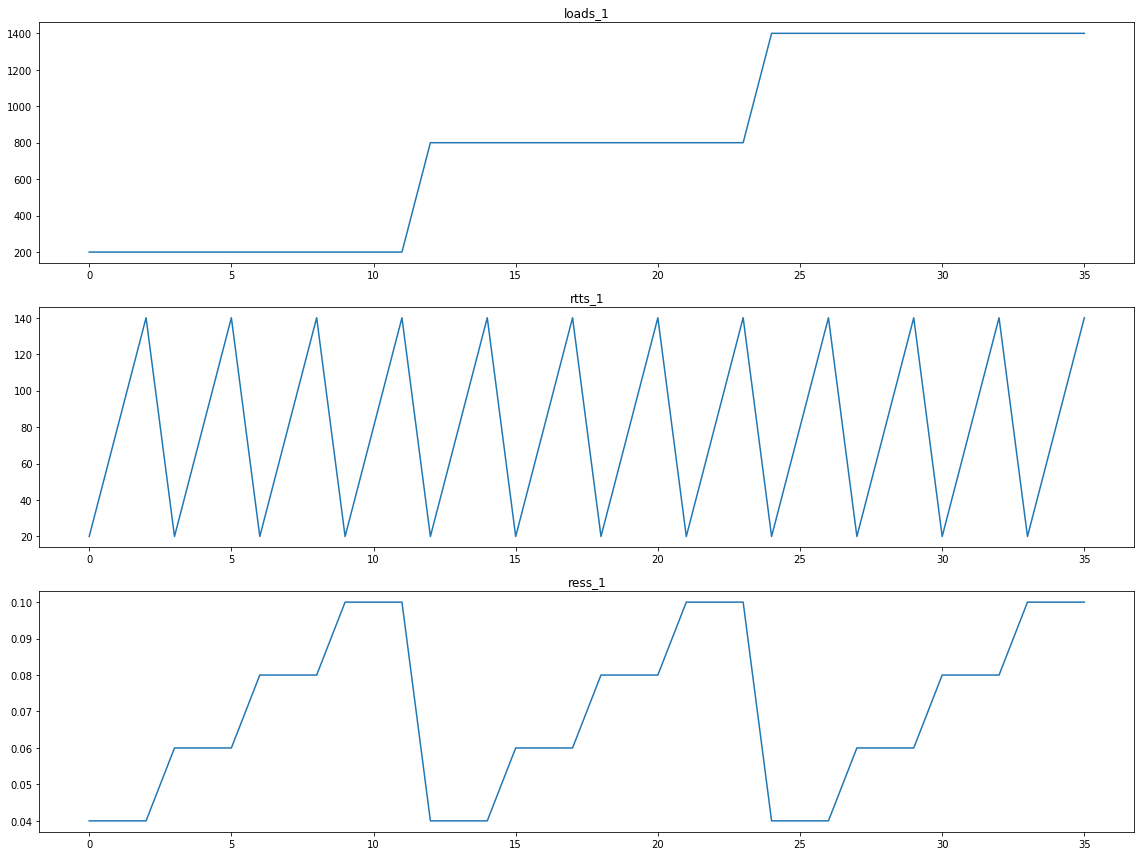

In [292]:
labels = "loads_1", "rtts_1", "ress_1"

plt.figure(figsize=(16, 12))
nplots = len(labels)
for col in range(nplots):
  plt.subplot(nplots, 1, col+1)
  plt.plot(range(len(eval(labels[col]))), eval(labels[col]))
  plt.title(labels[col])
plt.tight_layout()
plt.show()

In [307]:
data = _f(1, 20, _f(0, 800, [loads_1, rtts_1, r_1]))[2]
data2 = _f(1, 80, _f(0, 800, [loads_1, rtts_1, r_1]))[2]
data3 = _f(1, 140, _f(0, 800, [loads_1, rtts_1, r_1]))[2]
data4= _f(1, 20, _f(0, 200, [loads_1, rtts_1, r_1]))[2]
data5 = _f(1, 80, _f(0, 200, [loads_1, rtts_1, r_1]))[2]
data6 = _f(1, 140, _f(0, 200, [loads_1, rtts_1, r_1]))[2]
data7= _f(1, 20, _f(0, 1400, [loads_1, rtts_1, r_1]))[2]
data8 = _f(1, 80, _f(0, 1400, [loads_1, rtts_1, r_1]))[2]
data9 = _f(1, 140, _f(0, 1400, [loads_1, rtts_1, r_1]))[2]

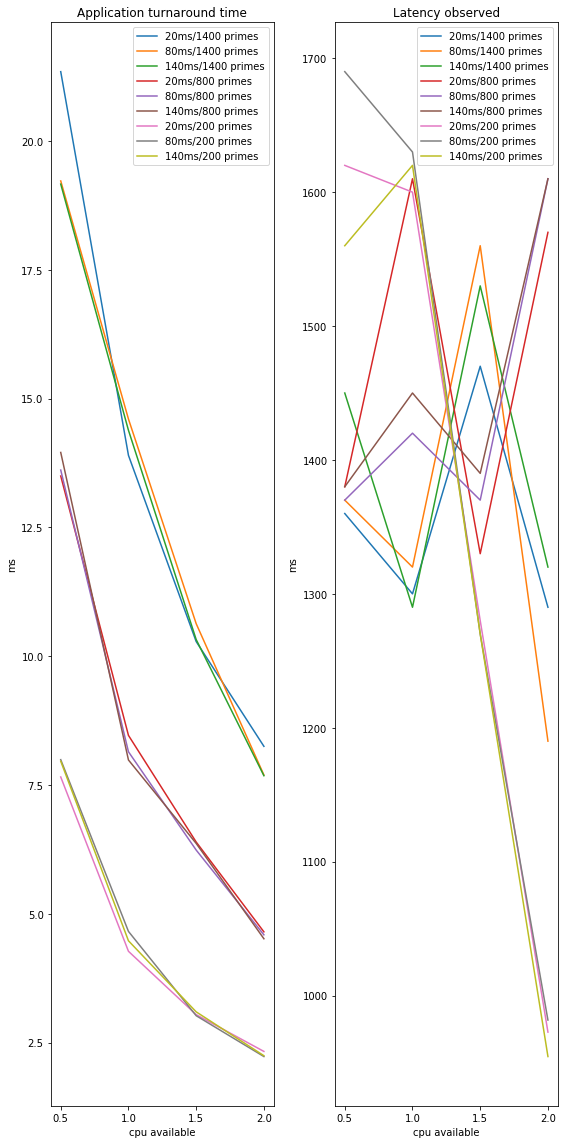

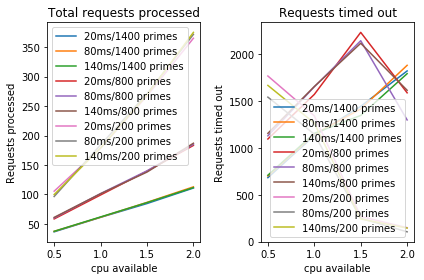

In [353]:
plt.figure(figsize=(8, 16))
col_i = [8, 0, 6,  5]
labels = ["Application turnaround time", "Latency observed",  "Total requests processed", "Requests timed out" ]
ylabels = ["ms", "ms", "Requests processed", "Requests timed out"]
xlabel="cpu available"
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.plot(data7[:,col_i[i]], label="20ms/1400 primes")
  plt.plot(data8[:,col_i[i]], label="80ms/1400 primes")
  plt.plot(data9[:,col_i[i]], label="140ms/1400 primes")
  plt.plot(data[:,col_i[i]], label="20ms/800 primes")
  plt.plot(data2[:,col_i[i]], label="80ms/800 primes")
  plt.plot(data3[:,col_i[i]], label="140ms/800 primes")
  plt.plot(data4[:,col_i[i]], label="20ms/200 primes")
  plt.plot(data5[:,col_i[i]], label="80ms/200 primes")
  plt.plot(data6[:,col_i[i]], label="140ms/200 primes")
  plt.xlabel(xlabel)
  plt.ylabel(ylabels[i])
  plt.xticks(range(4), (np.arange(4)*0.5)+0.5)
  plt.title(labels[i])
  plt.legend()
plt.tight_layout()
plt.show()
for i in range(2,4):
  plt.subplot(1, 2, i-1)
  plt.plot(data7[:,col_i[i]], label="20ms/1400 primes")
  plt.plot(data8[:,col_i[i]], label="80ms/1400 primes")
  plt.plot(data9[:,col_i[i]], label="140ms/1400 primes")
  plt.plot(data[:,col_i[i]], label="20ms/800 primes")
  plt.plot(data2[:,col_i[i]], label="80ms/800 primes")
  plt.plot(data3[:,col_i[i]], label="140ms/800 primes")
  plt.plot(data4[:,col_i[i]], label="20ms/200 primes")
  plt.plot(data5[:,col_i[i]], label="80ms/200 primes")
  plt.plot(data6[:,col_i[i]], label="140ms/200 primes")
  plt.xlabel(xlabel)
  plt.ylabel(ylabels[i])
  plt.xticks(range(4), (np.arange(4)*0.5)+0.5)
  plt.title(labels[i])
  plt.legend()
plt.tight_layout()
plt.show()